<a href="https://colab.research.google.com/github/GopalChinta/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 96.59%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



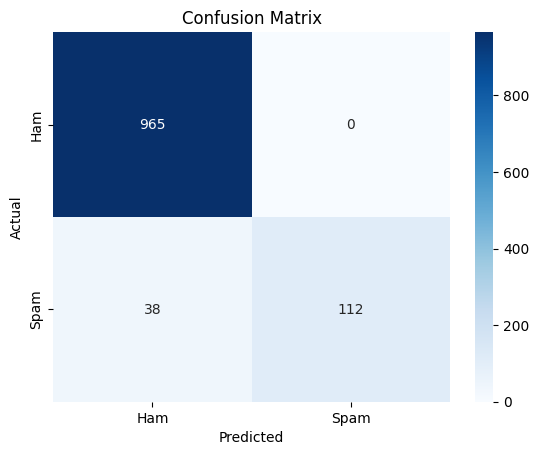

Message: "Congratulations! You have won a free iPhone. Claim your prize now!" -> Prediction: Spam - Fraudulent Offer 🎁
Message: "Dear customer, your bank account has been compromised. Click the link to secure it." -> Prediction: Ham (Safe)
Message: "Huge discounts on all items! Limited-time offer, shop now!" -> Prediction: Ham (Safe)
Message: "Hey, are we still on for lunch tomorrow?" -> Prediction: Ham (Safe)
Message: "Update your Facebook account now to avoid suspension." -> Prediction: Ham (Safe)


In [4]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLP resources
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary

# Define phishing and fraudulent keywords
phishing_keywords = ["bank", "account", "verify", "password", "security", "click"]
fraudulent_keywords = ["win", "prize", "free", "claim", "limited", "exclusive"]

# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['cleaned_message'] = df['message'].apply(preprocess_text)

# Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to Predict and Categorize Spam Messages
def predict_spam(text):
    text_cleaned = preprocess_text(text)

    # Spam detection using trained model
    text_vec = vectorizer.transform([text_cleaned])
    prediction = model.predict(text_vec)[0]

    # Additional checks for specific applications
    contains_phishing = any(word in text_cleaned for word in phishing_keywords)
    contains_fraud = any(word in text_cleaned for word in fraudulent_keywords)

    if prediction == 1:
        if contains_phishing:
            return "Spam - Phishing Attempt 🚨"
        elif contains_fraud:
            return "Spam - Fraudulent Offer 🎁"
        else:
            return "Spam"
    else:
        return "Ham (Safe)"

# Example Messages for Different Applications
messages = [
    "Congratulations! You have won a free iPhone. Claim your prize now!",
    "Dear customer, your bank account has been compromised. Click the link to secure it.",
    "Huge discounts on all items! Limited-time offer, shop now!",
    "Hey, are we still on for lunch tomorrow?",
    "Update your Facebook account now to avoid suspension."
]

for msg in messages:
    print(f'Message: "{msg}" -> Prediction: {predict_spam(msg)}')


In [3]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv
